<a href="https://colab.research.google.com/github/pedrocz82/Data-Science-learning-projects/blob/main/An%C3%A1lise_explorat%C3%B3ria_do_dataset_listings_da_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resumo**

Segundo o site https://www.airbnb.com.br/help/article/2503/o-que-%C3%A9-o-airbnb-e-como-ele-funciona, o Airbnb iniciou suas atividades em 2008 e possibilitou que milhões de anfitriões e viajantes criassem uma conta gratuita e anunciassem seu espaço, reservando acomodações em qualquer lugar do mundo. 
O objetivo deste trabalho é fazer uma análise exploratória dos dados da cidade do Rio de Janeiro utilizando algumas bibliotecas para extrair informações dos dados brutos.


# Significado das colunas do dataset

neighbourhood_cleansed - nome dos bairros

latitude - coordenada da propriedade

longitude - coordenada da propriedade

property_type - tipo da propriedade

room_type - tipo de quarto oferecido

accomodates - número de acomodações

bedrooms - número de quartos

bed - número de camas

price - valor de aluguel da propriedade

minimum_nights - número mínimo de noites para reservar

availability_365 - número de dias disponíveis em 365 dias

number_of_reviews - número de avaliações da propriedade

review_scores_rating - pontuação da propriedade


# Importação de bibliotecas e carregamento e preparo do dataset

In [5]:
#Importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [6]:
# Carregando o dataset
df = pd.read_csv('/content/sample_data/listings2.csv') 

In [7]:
# 3 primeiras linhas do DataFrame
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5.0,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5.0,180.0,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0.0,8.0,38.0,304.0,2021-02-23,260.0,12.0,2.0,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1.0,1.0,0.0,0.0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3.0,90.0,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0.0,0.0,0.0,10.0,2021-02-23,85.0,0.0,0.0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1.0,1.0,0.0,0.0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2.0,NaN,1 bath

In [8]:
#Serão selecionadas apenas algumas colunas para este estudo
study_columns = ['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
                 'beds', 'price', 'minimum_nights','availability_365','number_of_reviews', 'review_scores_rating', ] 

df = df[study_columns]

In [9]:
#listando as colunas do novo DataFrame
df.columns

Index(['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')

In [10]:
#dimensões do DataFrame (linhas, colunas)
print('Dimensões do DataFrame:')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Dimensões do DataFrame:
Linhas: 10992
Colunas: 13


In [11]:
#removendo possíveis duplicatas
df.drop_duplicates(inplace=True)

In [12]:
#confirmando retirada das duplicatas
df.duplicated().sum()

0

In [13]:
#checagem de valores faltantes, valores faltantes/total e tipo
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("_________________________________________________________________________________________________________")
        print(f"{column} -> Missing Values: {df[column].isnull().sum()} |Missing Values/total__ : {df[column].isnull().sum()/df.shape[0]} | dtypes: {df[column].dtypes}")

_________________________________________________________________________________________________________
latitude -> Missing Values: 1 |Missing Values/total__ : 9.1000091000091e-05 | dtypes: float64
_________________________________________________________________________________________________________
longitude -> Missing Values: 1 |Missing Values/total__ : 9.1000091000091e-05 | dtypes: float64
_________________________________________________________________________________________________________
property_type -> Missing Values: 1 |Missing Values/total__ : 9.1000091000091e-05 | dtypes: object
_________________________________________________________________________________________________________
room_type -> Missing Values: 1 |Missing Values/total__ : 9.1000091000091e-05 | dtypes: object
_________________________________________________________________________________________________________
accommodates -> Missing Values: 1 |Missing Values/total__ : 9.1000091000091e-05 | dtypes:

In [14]:
#verificação da coluna preço
df.price

0        $221.00
1        $307.00
2        $160.00
3        $273.00
4        $135.00
          ...   
10987    $387.00
10988     $99.00
10989    $350.00
10990     $90.00
10991        NaN
Name: price, Length: 10989, dtype: object

In [15]:
#substituição de variável tipo string por variavel tipo float, retirando também as cifras
df['price'] = df['price'].str.replace('[$,]', '').astype('float')

# Tratamento de valores nulos

Os valores nulos serão preenchidos com a mediana no caso de quartos e camas e considerados como uma estimativa.

In [16]:
df.dropna(subset=['room_type'], inplace=True)

In [17]:
df.bedrooms.fillna(value = df.bedrooms.median(), inplace = True)
df.beds.fillna(value = df.beds.median(), inplace = True)
df.review_scores_rating.fillna(value = df.review_scores_rating.median(), inplace = True)

# Avaliação estatística das variáveis

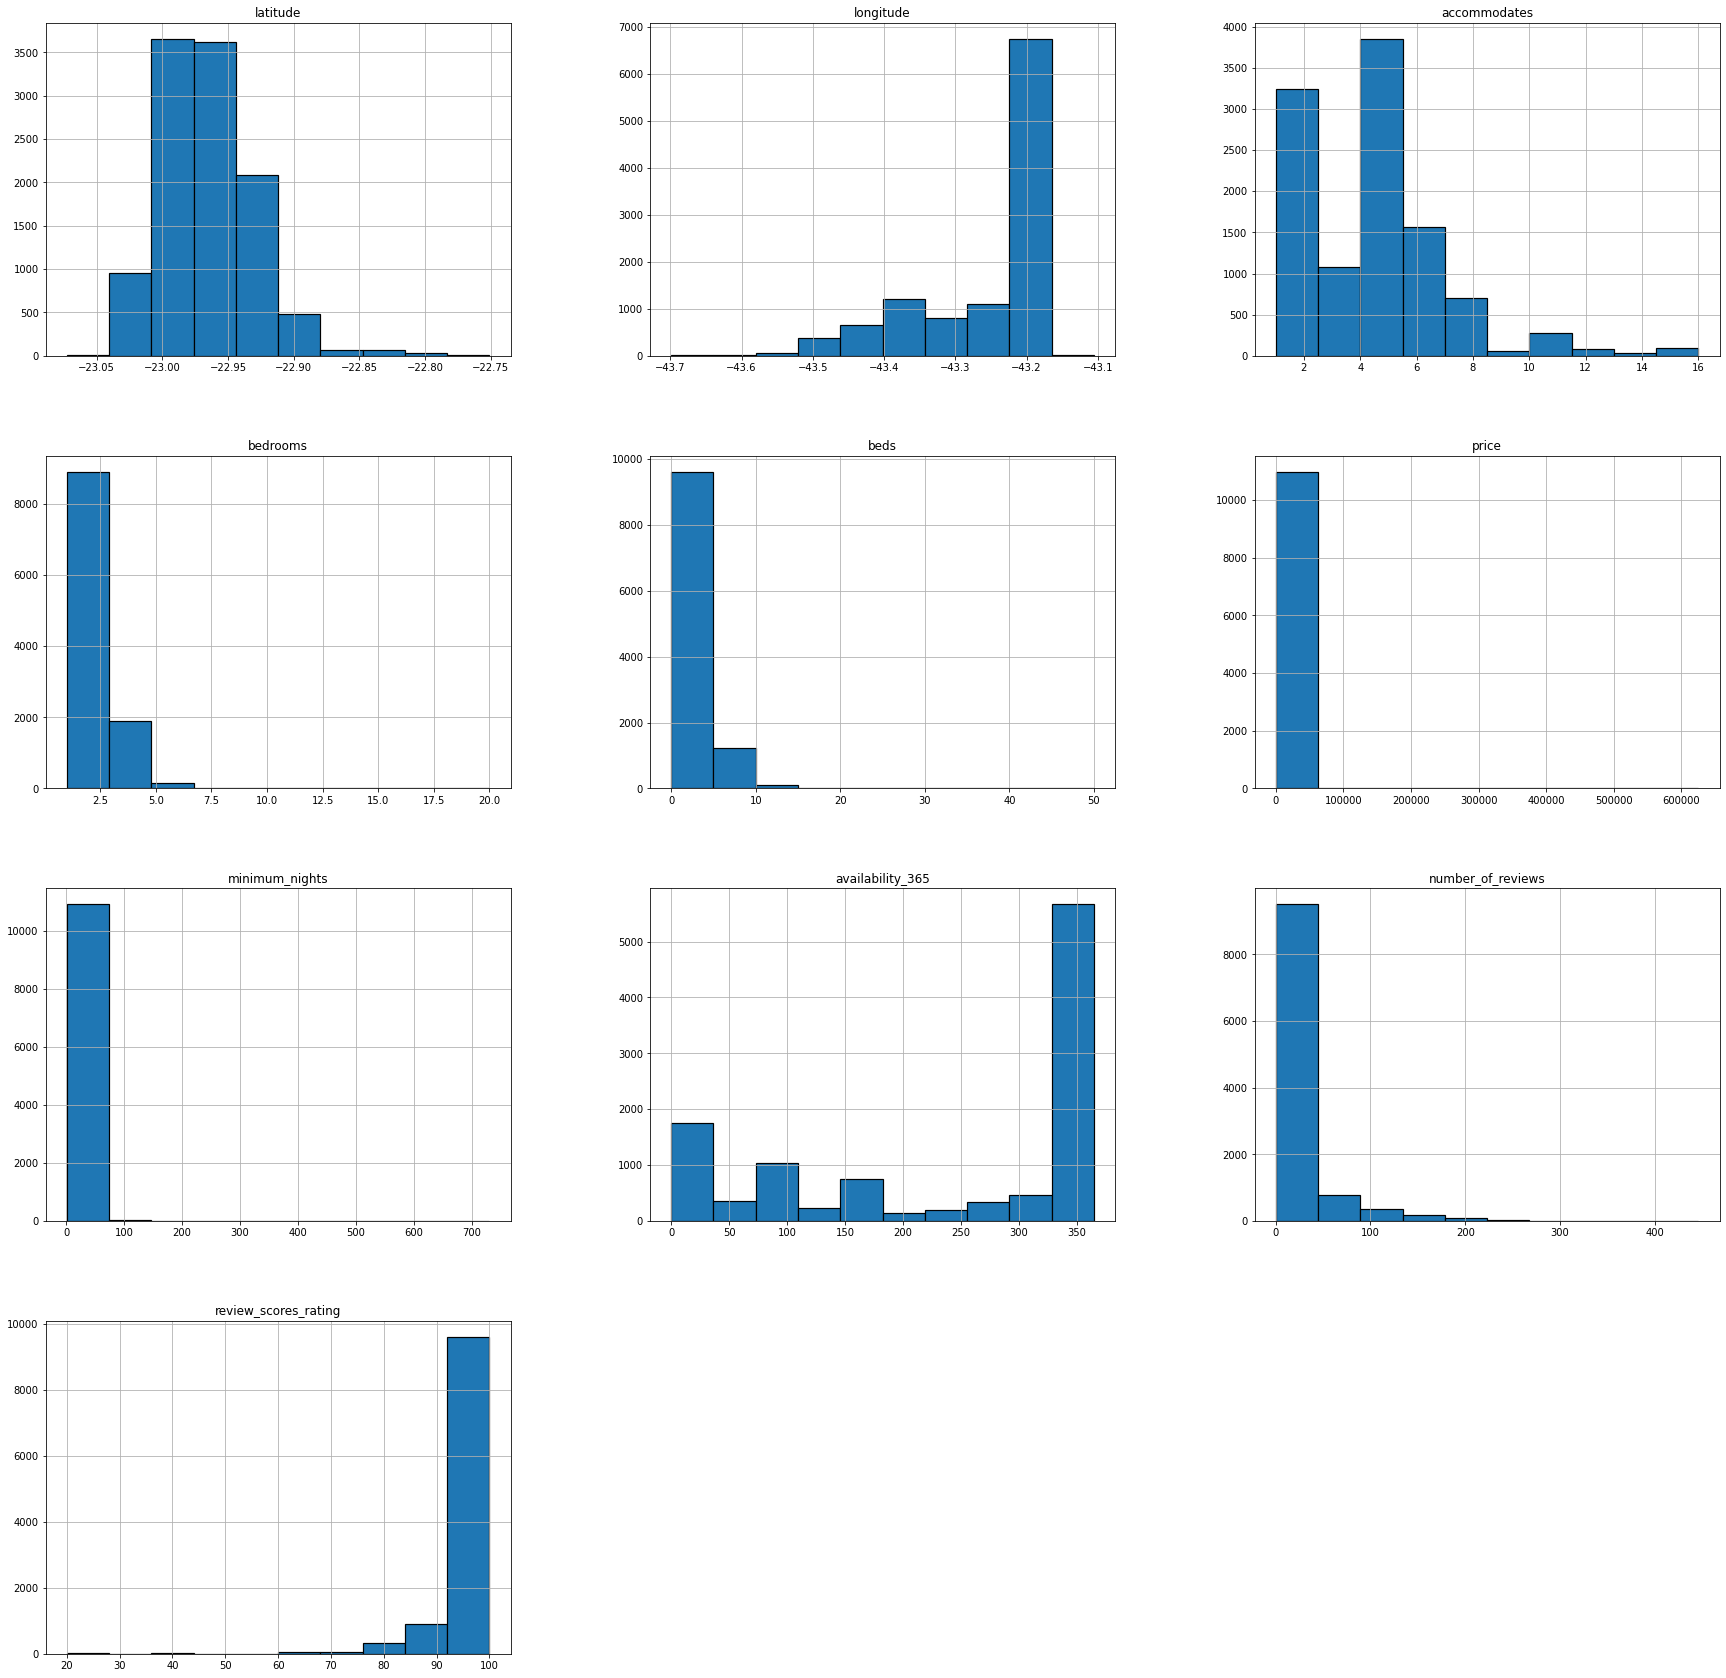

In [18]:
#distribuição em Histograma das variaveis
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [19]:
#estatistica descritiva das variáveis
df.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000
mean,-22.964593,-43.252618,4.243174,1.728886,2.601565,925.238533,5.760557,240.669185,19.000728,95.536949
std,0.034568,0.095153,2.452205,1.035607,2.088897,6867.784838,21.279173,144.032026,40.757598,6.125667
min,-23.072860,-43.698780,1.000000,1.000000,0.000000,33.000000,1.000000,0.000000,0.000000,20.000000
25%,-22.984522,-43.319185,2.000000,1.000000,1.000000,190.000000,2.000000,89.000000,0.000000,95.000000
50%,-22.970940,-43.200755,4.000000,1.000000,2.000000,350.000000,3.000000,336.000000,2.000000,97.000000
75%,-22.944093,-43.187550,6.000000,2.000000,3.000000,800.000000,5.000000,364.000000,15.000000,98.000000
max,-22.750860,-43.105540,16.000000,20.000000,50.000000,625216.000000,730.000000,365.000000,446.000000,100.000000


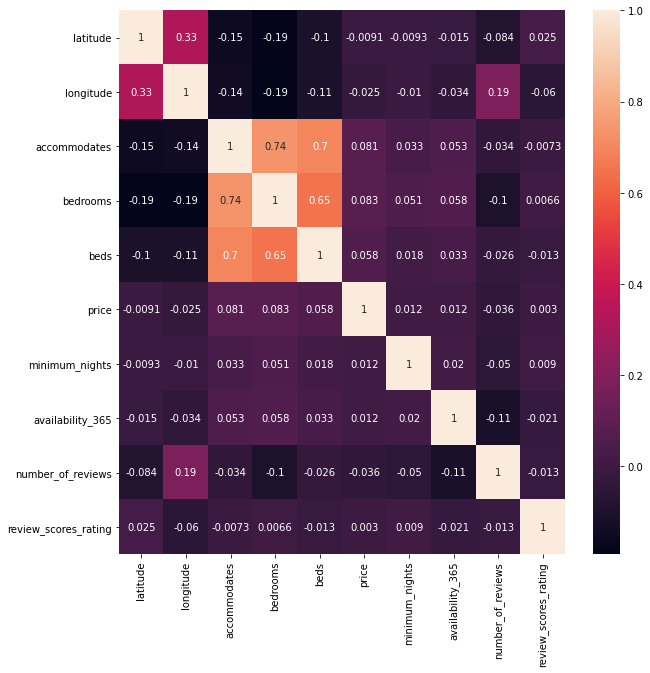

In [20]:
#correlação entre as variaveis
correlations = df.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

# Remoção de outliers das colunas "price" e "minumum_night"

In [21]:
#remoção de outlier na coluna "price"
q1 = df['price'].quantile(.25)
q3 = df['price'].quantile(.75)
iqr = q3-q1
highrange = q3 + iqr * 1.5
lowrange = q1 - iqr * 1.5
df = df.drop(df[df['price'] > highrange].index)
df = df.drop(df[df['price'] < lowrange].index)

In [22]:
print(df['price'].quantile(0.995))
print(df['price'].mean())
print(df['price'].median())

1636.0
454.6619578193394
300.0


In [23]:
print(df['price'].skew())
print(df['price'].kurtosis())

1.3636159425971952
1.1089430398507578


In [24]:
print(df.minimum_nights.kurtosis())

375.7464159624005


In [25]:
#retirando outliers de 'minimum_nights'
q1 = df['minimum_nights'].quantile(.25)
q3 = df['minimum_nights'].quantile(.75)
iqr = q3-q1
highrange = q3 + iqr * 1.5
lowrange = q1 - iqr * 1.5
df = df.drop(df[df['minimum_nights'] > highrange].index)
df = df.drop(df[df['minimum_nights'] < lowrange].index)

In [26]:
print(df['minimum_nights'].skew())
print(df['minimum_nights'].kurtosis())

0.9638530297263778
0.2814371305448784


# Valores médios por noite

In [27]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $432.60
Maximum price per night : $1714.0
Minimum price per night : $35.0


#quantidade de cada tipo de imóvel disponível


In [28]:
df.room_type.value_counts()

Entire home/apt    6299
Private room       2579
Shared room         179
Hotel room           34
Name: room_type, dtype: int64

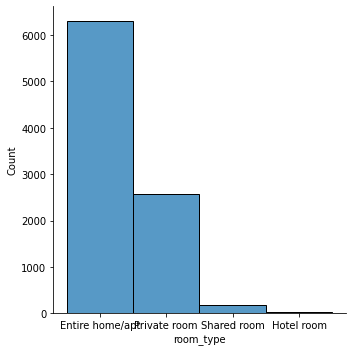

In [29]:
#distribuição dos valores de quantidade de tipo de imoveis
sns.displot(data=df, x="room_type")

# comparação dos valores por tipo de quarto disponível

Os valores de preço quando considerados por tipo de imóvel, possuem outlier. Observa-se que há pouca diferença na disribuição dos valores entre os tipos de quarto.

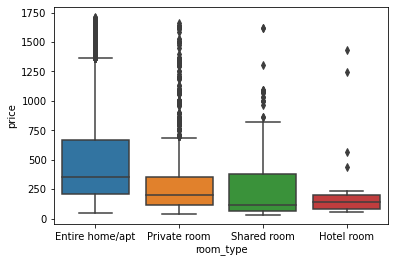

In [30]:
ax = sns.boxplot(x="room_type", y="price", data=df)

# 10 bairros mais caros

In [31]:
df.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_cleansed
Cacuia                    1500.0
Realengo                  1500.0
Sepetiba                  1364.0
Freguesia (Ilha)          1358.0
Vista Alegre              1326.0
Inhoaíba                  1086.0
Osvaldo Cruz              1007.5
Benfica                   1000.0
Ricardo de Albuquerque     959.0
Mangueira                  800.0
Name: price, dtype: float64

# Distribuição de valores entre os 10 bairros mais caros por tipo de quarto 

---



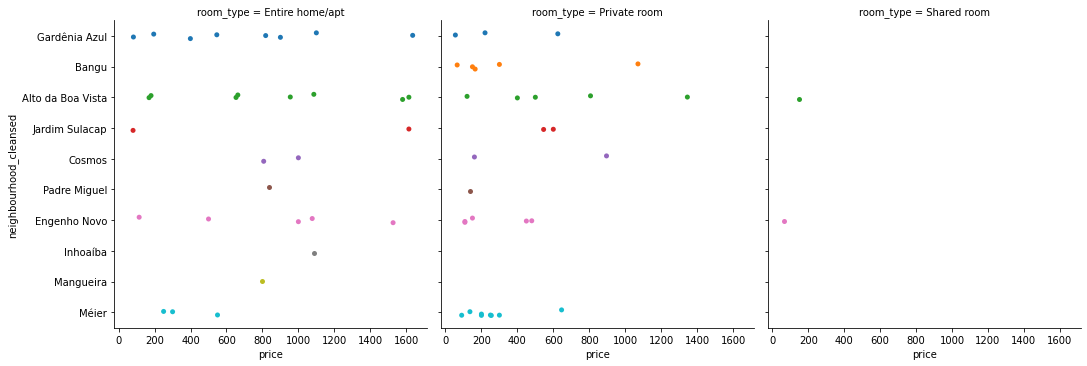

In [32]:
expensive_neighbourhood = ['Méier', 'Inhoaíba', 'Gardênia Azul', 'Cosmos', 'Padre Miguel', 'Mangueira', 'Alto da Boa Vista', 'Bangu', 'Jardim Sulacap', 'Engenho Novo']
exp_neighbourhood = df[df.neighbourhood_cleansed.isin(expensive_neighbourhood)]
ax = sns.catplot(x="price", y="neighbourhood_cleansed", col = "room_type", data=exp_neighbourhood)

# 10 bairros mais baratos

In [33]:
df.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending=True)[:10]

neighbourhood_cleansed
Parque Anchieta       67.500000
Quintino Bocaiúva     73.333333
Vila Militar         109.000000
Gericinó             110.000000
Penha Circular       112.666667
Bancários            114.000000
Jardim Carioca       119.333333
Penha                122.500000
Brás de Pina         124.428571
Bonsucesso           128.000000
Name: price, dtype: float64

# Distribuição de valores entre os 10 bairros mais baratos por tipo de quarto 

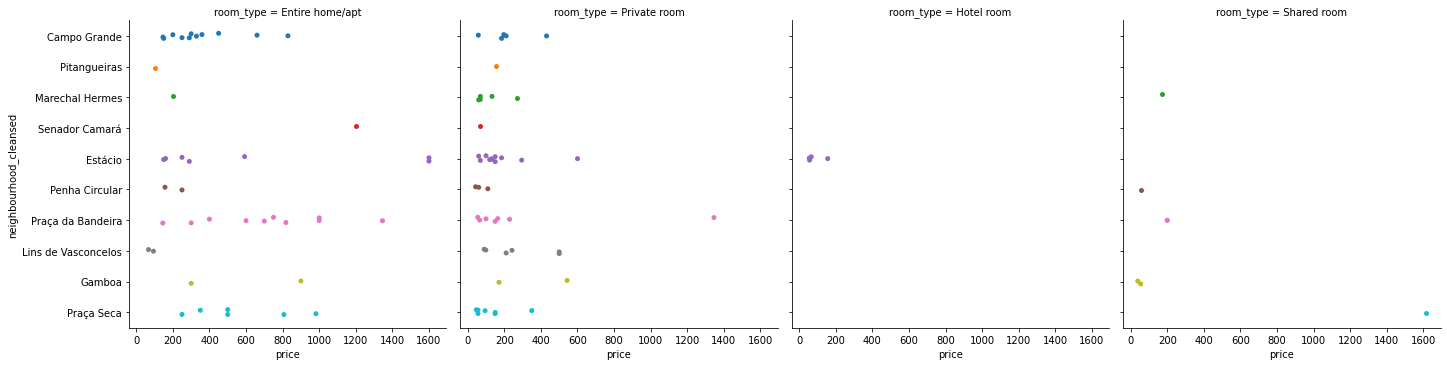

In [34]:
cheap_neighbourhood = ['Praça Seca', 'Senador Camará', 'Penha Circular', 'Pitangueiras', 'Praça da Bandeira', 'Lins de Vasconcelos', 'Estácio', 'Gamboa', 'Marechal Hermes', 'Campo Grande']
ch_neighbourhood = df[df.neighbourhood_cleansed.isin(cheap_neighbourhood)]
ax = sns.catplot(x="price", y="neighbourhood_cleansed", col = "room_type", data=ch_neighbourhood)

# Disponibilidade de quartos nos bairros por tipo de quarto

<Figure size 720x720 with 0 Axes>

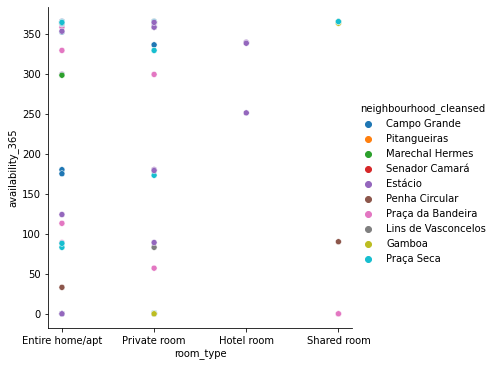

In [35]:
plt.figure(figsize=(10,10))
ax = sns.relplot(data=ch_neighbourhood, x='room_type',y='availability_365',hue = 'neighbourhood_cleansed', sizes = (100))

# Distribuição geográfica dos imóveis

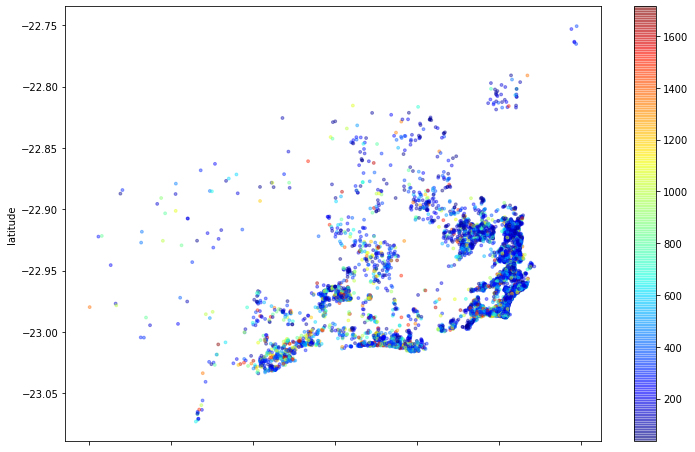

In [36]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Distribuição por tipo de propriedade para valores superiores a 1000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


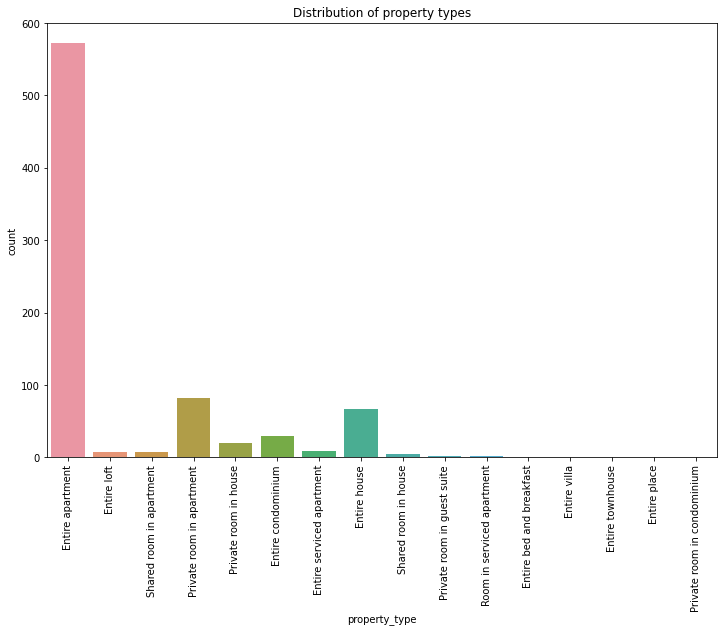

In [37]:
df2 = df[df['price']> 1000]
plt.figure(figsize=(12,8))
ax = sns.countplot('property_type', data=df2)
ax.tick_params(axis='x', rotation=90)
_ = ax.set_title('Distribution of property types')

# Pontuação nas avaliações e noites mínimas de estadia nos tipos de quarto de cada bairro 

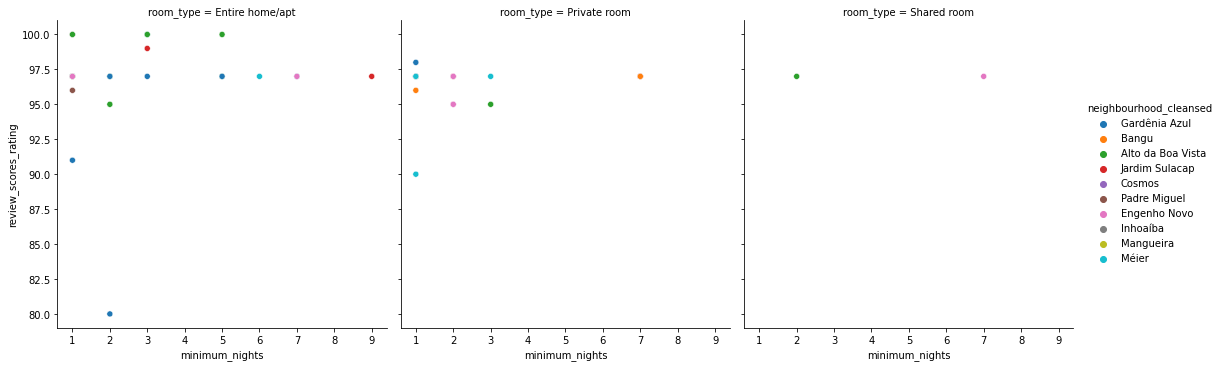

In [38]:
  sns.relplot(x = 'minimum_nights', y = 'review_scores_rating', hue = 'neighbourhood_cleansed', col = 'room_type', data = exp_neighbourhood)


# representação gráfica com stripplot mostrando a distribuição por tipo de imóvel (private room)

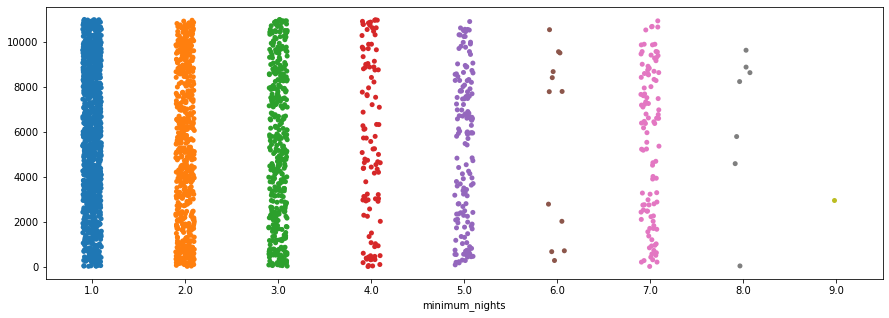

In [39]:
df1 = df[df.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

# Distribuição de cômodos por valores e disponibilidade de camas nos bairros mais baratos

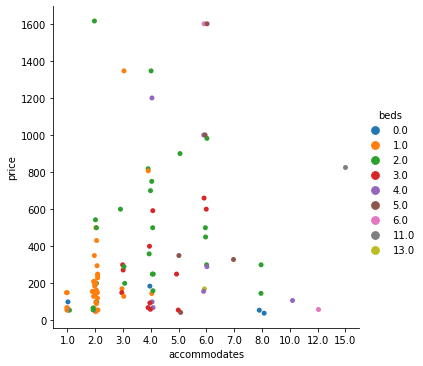

In [40]:
ax = sns.catplot(x="accommodates", y="price", hue="beds", data=ch_neighbourhood)

# **Conclusão e perspectivas**

Este trabalho teve como objetivo realizar uma análise de dados exploratória da base de dados do Airbnb - Rio de Janeiro. Foi feito um tratamento inicial dos dados, selecionando as colunas para trabalhar, seguida do tratamento dos dados faltantes e duplicados. Observou-se a presença de outliers na coluna "price" e "minimun night", que foram retirados. Procurei explorar a biblioteca seaborn na maior parte das avaliações, usando diferentes gráficos e relações entre as variáveis. 
Com base nestes tratamentos, foi possível avaliar os diferentes bairros com relação a valores, disponibilidade, tipos de quarto e acomodações, além da distribuição geográfica, valores médios por noite, comparação entre diferentes tipos de quarto, tipos de propriedades, entre outros.
Foi um estudo inicial de exploração de dados que pode auxiliar na aplicação de outras ferramentas estatísticas, bem como no aprendizado de máquina, como por exemplo, previsão de preço com base nos dados das colunas.